# Bitácora 2 - Difracción de Electrones

In [ ]:
import IPython.display as Image

## Datos básicos


Universdad de los Andes, Bogotá, Colombia


Sesión 1: 30 de agosto de 2024 (16:00 - 18:00)

Sesión 2: 6 de septiembre de 2024 (17:000 - 18:00)


Integrante: Juan Sebastián Sánchez / Número de estudiante: blabla bla / Número de celular: 3002287930.

Integrante: Juan José Guzmán / Número de estudiante: 202214541 / Número de celular: 3054457204.



Grupo 5 - Laboratorio Intermedio - Sección 2


## Ubicación de los datos tomados

Los datos fueron reportados en un archivo de excel llamado "Toma de datos" y se guardó en un repositorio de GitHub denominado "LabIntermedio2024-2" en la carpeta "Difracción_Electrones".

Repositorio de GitHub: https://github.com/QuantumPower4/LabIntermedio2024-2/blob/main/Difracción_Electrones/Toma%20de%20datos.xlsx

In [ ]:
%pip install uncertainties

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import uncertainties as unc

def linear_function(X, a):
    return a * X

In [ ]:
D1 = np.array([26.4,25.85,25.3,24.5,24.1,23.35,23.25,22.45])
D2 = np.array([46.1,45.45,44.4,42.9,41.9,40.6,40.5,39.8])
Espesor1 = np.array([0.98,0.85,1.5,1.15,1.1,1,1.1,1.2])
Espesor2 = np.array([1.4,1.2,1.3,1.4,1.4,1.4,1.15,1.3])
V = np.array([3.6,3.8,4,4.2,4.4,4.6,4.8,5])
sigmaV = np.array([0.1]*len(V))

In [ ]:
m = 9.11e-31 #kg
e = 1.6e-19 #C
h = 6.626e-34 #Js
d1 = 213 #pm
d2 = 123 #pm
L = 0.135e3 #mm

braggD1 = 2*d1*np.sin(0.5*np.arctan(D1/(2*L)))
braggD2 = 2*d2*np.sin(0.5*np.arctan(D2/(2*L)))
broglie = (h/np.sqrt(2*e*m*V*1e3))*1e12

sigma_braggD1 = 0.5*np.sqrt( np.cos(0.5*np.arctan(D1/(2*L)))**2 / (D1**2 + 4*L**2)**2 )*L*d1*Espesor1
sigma_braggD2 = 0.5*np.sqrt( np.cos(0.5*np.arctan(D2/(2*L)))**2 / (D2**2 + 4*L**2)**2 )*L*d2*Espesor2
sigma_broglie = 0.25*np.sqrt(2)*(h*sigmaV*(1e3)/np.sqrt(e*m*(V*1e3)**3))*1e12

sigma_braggD1, sigma_braggD2,sigma_broglie

(array([0.19122015, 0.16592708, 0.29293848, 0.22472309, 0.21501648,
        0.19557606, 0.21514902, 0.23483952]),
 array([0.15437442, 0.13243901, 0.14367884, 0.15503586, 0.15523386,
        0.15548496, 0.12773542, 0.14451908]),
 array([0.28407532, 0.26194606, 0.24254776, 0.22543084, 0.21023656,
        0.19667561, 0.18451233, 0.17355305]))

In [ ]:
DataFrame = pd.DataFrame({'D1 [mm]':D1,'D2 [mm]':D2,'Espesor1 [mm]':Espesor1,
                          'Espesor2 [mm]':Espesor2,'V [kV]':V,"Sigma V [kV]":sigmaV,
                          "λ Bragg D1 [pm]":braggD1, "λ Bragg D2 [pm]":braggD2, "λ Broglie [pm]":broglie})
DataFrame

,D1 [mm],D2 [mm],Espesor1 [mm],Espesor2 [mm],V [kV],Sigma V [kV],λ Bragg D1 [pm],λ Bragg D2 [pm],λ Broglie [pm]
0,26.40,46.10,0.98,1.40,3.6,0.1,20.752457,20.775754,20.453423
1,25.85,45.45,0.85,1.20,3.8,0.1,20.323093,20.488930,19.907900
2,25.30,44.40,1.50,1.30,4.0,0.1,19.893542,20.025064,19.403821
3,24.50,42.90,1.15,1.40,4.2,0.1,19.268415,19.361274,18.936190
4,24.10,41.90,1.10,1.40,4.4,0.1,18.955710,18.918031,18.500817
5,23.35,40.60,1.00,1.40,4.6,0.1,18.369141,18.340980,18.094156
6,23.25,40.50,1.10,1.15,4.8,0.1,18.290907,18.296553,17.713184
7,22.45,39.80,1.20,1.30,5.0,0.1,17.664843,17.985412,17.355305


In [ ]:
Vnew = V**(-1/2)
sigmaVnew = sigmaV*V**(-3/2)/2
popt1, pcov1 = curve_fit(linear_function, Vnew, D1, sigma=Espesor1, absolute_sigma=True)
popt2, pcov2 = curve_fit(linear_function, Vnew, D2, sigma=Espesor2, absolute_sigma=True)

Text(0, 0.5, 'Espesor (mm)')

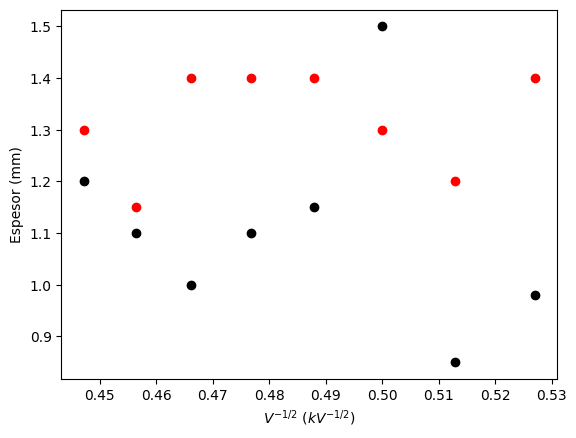

In [ ]:
plt.scatter(Vnew,Espesor1,color="black",label="Espesor D1")
plt.scatter(Vnew,Espesor2,color="red", label="Espesor D2")
plt.xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
plt.ylabel('Espesor (mm)')

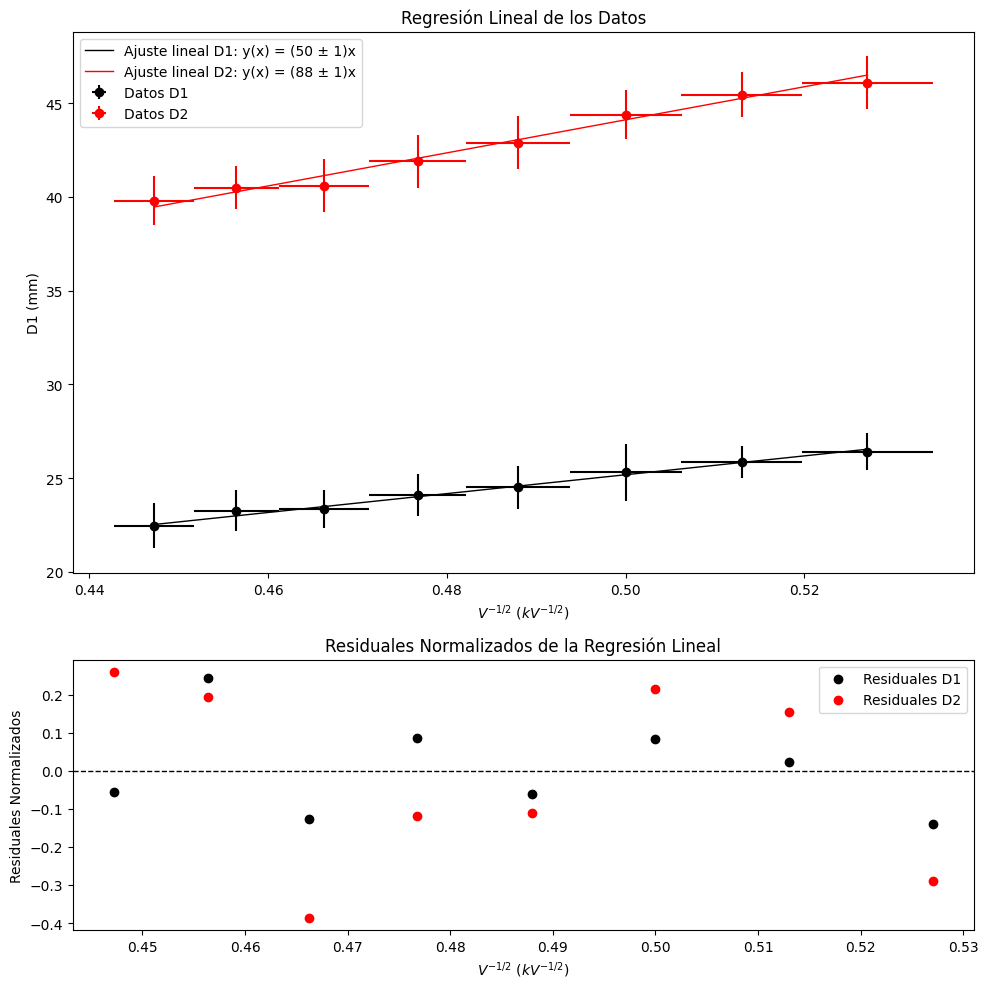

In [ ]:
slope1 = popt1[0]
#intercept1 = popt1[1]

slope_std_err1 = np.sqrt(pcov1[0, 0])
#intercept_std_err1 = np.sqrt(pcov1[1, 1])

Y_pred = linear_function(Vnew, *popt1)
residuals = (D1 - Y_pred)/Espesor1


slope2 = popt2[0]
#intercept2 = popt2[1]

slope_std_err2 = np.sqrt(pcov2[0, 0])
#intercept_std_err2 = np.sqrt(pcov2[1, 1])

Y_pred2 = linear_function(Vnew, *popt2)
residuals2 = (D2 - Y_pred2)/Espesor2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

ax1.errorbar(Vnew, D1, yerr= Espesor1,xerr=sigmaVnew,  fmt='o', label='Datos D1', color="black")
ax1.errorbar(Vnew, D2, yerr= Espesor2,xerr=sigmaVnew,  fmt='o', label='Datos D2', color="red")
#ax1.plot(Vnew, Y_pred, color='black', linewidth=1, label=f'Ajuste lineal D1: y(x) = ({slope1:.0f} ± {slope_std_err1:.0f})x + ({intercept1:.0f} ± {intercept_std_err1:.0f})')
#ax1.plot(Vnew, Y_pred2, color='red', linewidth=1, label=f'Ajuste lineal D2: y(x) = ({slope2:.0f} ± {slope_std_err2:.0f})x + ({intercept2:.0f} ± {intercept_std_err2:.0f})')

ax1.plot(Vnew, Y_pred, color='black', linewidth=1, label=f'Ajuste lineal D1: y(x) = ({slope1:.0f} ± {slope_std_err1:.0f})x')
ax1.plot(Vnew, Y_pred2, color='red', linewidth=1, label=f'Ajuste lineal D2: y(x) = ({slope2:.0f} ± {slope_std_err2:.0f})x')

ax1.set_xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
ax1.set_ylabel('D1 (mm)')
ax1.legend(loc='upper left')
ax1.set_title('Regresión Lineal de los Datos')

# Plot normalized residuals
ax2.scatter(Vnew, residuals, color='black', alpha=1, label='Residuales D1')
ax2.scatter(Vnew, residuals2, color='red', alpha=1, label='Residuales D2')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='upper right')
ax2.set_title("Residuales Normalizados de la Regresión Lineal")

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_curve_fit.pdf', format='pdf')
plt.show()

In [ ]:
d1_exp = ( 2*L*1e-3*h / (slope1*(np.sqrt(1000)/1e3)*np.sqrt(2*e*m)) )*1e12
sigma_d1_exp = ( 2*L*1e-3*h /np.sqrt(2*e*m) )*(slope_std_err1/slope1**2)/(np.sqrt(1000)/1e3)*1e12
d1_err = (213-d1_exp) / sigma_d1_exp
d1_inc = sigma_d1_exp/d1_exp
print('Valor experimental D1: {0:.0f}, Incertidumbre: {1:.0f}, Error: {2:.4}, Incertidumbre porcentual: {3:.4}'.format(d1_exp,sigma_d1_exp,d1_err,d1_inc))

Valor experimental D1: 208, Incertidumbre: 3, Error: 1.528, Incertidumbre porcentual: 0.01541


In [ ]:
d2_exp = ( 2*L*1e-3*h / (slope2*(np.sqrt(1000)/1e3)*np.sqrt(2*e*m)) )*1e12
sigma_d2_exp = ( 2*L*1e-3*h /np.sqrt(2*e*m) )*(slope_std_err2/slope2**2)/(np.sqrt(1000)/1e3)*1e12

d2_err = (123-d2_exp) / sigma_d2_exp
d2_inc = sigma_d2_exp/d2_exp

d2_exp, sigma_d2_exp, d2_err, d2_inc

(118.74844739813166,
 1.2851288320058478,
 3.308269564875029,
 0.010822279029023057)

In [ ]:
(123-119)/1

4.0

In [ ]:
h_1 = slope1*(np.sqrt(1000)/1e3)*d1*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
sigmah_1 = slope_std_err1*(np.sqrt(1000)/1e3)*d1*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)

h1_err = -(6.626e-34-h_1) / sigmah_1
h1_inc = sigmah_1/h_1

h_1, sigmah_1, h1_err, h1_inc

(6.782050842982781e-34,
 1.0451509700788183e-35,
 1.4930937964972943,
 0.015410544601861986)

In [ ]:
h_2 = slope2*(np.sqrt(1000)/1e3)*d2*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
sigmah_2 = slope_std_err2*(np.sqrt(1000)/1e3)*d2*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)

h2_err = -(6.626e-34-h_2) / sigmah_2
h2_inc = sigmah_2/h_2

h_2, sigmah_2, h2_err, h2_inc

(6.863230786231087e-34,
 7.427579860917413e-36,
 3.1939176780764456,
 0.010822279029023059)